<a href="https://colab.research.google.com/github/minaaam12/Customer_behavior_analysis/blob/main/Customer_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()




Saving shopping_behavior_updated.csv to shopping_behavior_updated.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=pd.read_csv(f'shopping_behavior_updated.csv')

print(df.head(5))
print(df.isnull().sum())
print(df.info())


pd.set_option('display.max_columns', None)
print(df.describe().T)

print(df['Age'].sort_values().unique())
print(df['Gender'].unique())
print(df['Item Purchased'].unique())
print(df['Category'].unique())
print(df['Location'].unique())
print(df['Size'].unique())
print(df['Color'].unique())
print(df['Season'].unique())
print(df['Subscription Status'].unique())
print(df['Shipping Type'].unique())
print(df['Discount Applied'].unique())
print(df['Promo Code Used'].unique())
print(df['Payment Method'].unique())
print(df['Frequency of Purchases'].unique())

duplicated_data=df[df.duplicated()].sort_values('Customer ID')
print(duplicated_data)

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

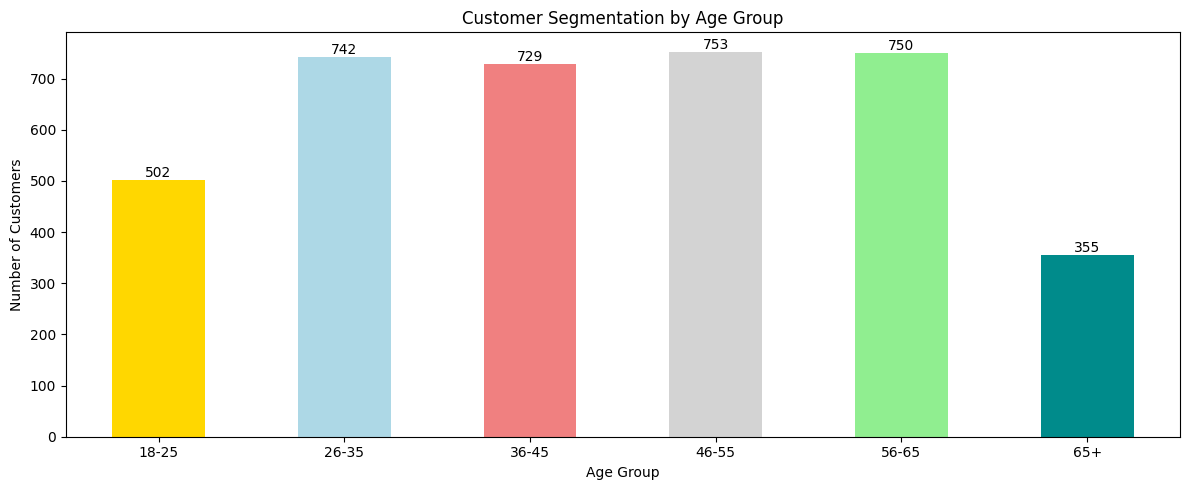

In [6]:
#%% Customer Segmentation By Age Group
bins=[18,25,35,45,55,65,float('inf')]
labels=['18-25','26-35','36-45','46-55','56-65','65+']
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels)

total_customer_by_age_group=df['Age Group'].value_counts().sort_index()
colors=['gold','lightblue','lightcoral','lightgray','lightgreen','darkcyan']
bars=total_customer_by_age_group.plot(kind='bar',color=colors,figsize=(12,5))
plt.title('Customer Segmentation by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')

for bar in bars.patches:
    height=bar.get_height()
    bars.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()



<ipython-input-7-edcf3ec780c1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_customer_by_age_group_and_gender=df.groupby(['Age Group'])['Gender'].value_counts().unstack()


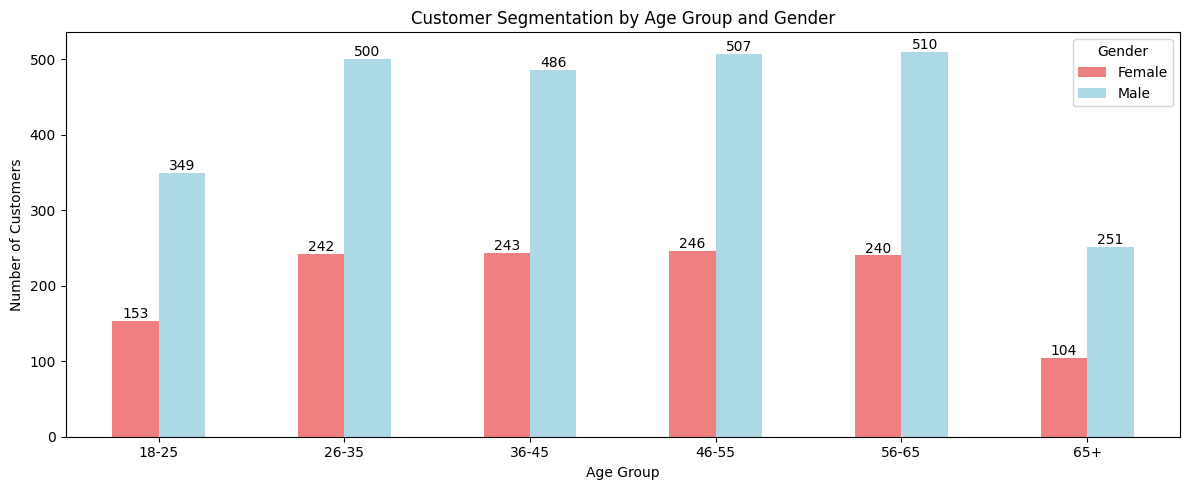

In [7]:
#%% Customer Segmentation by Age Group and Gender

total_customer_by_age_group_and_gender=df.groupby(['Age Group'])['Gender'].value_counts().unstack()
colors=['lightcoral','lightblue']
bars=total_customer_by_age_group_and_gender.plot(kind='bar',color=colors,figsize=(12,5))
plt.title('Customer Segmentation by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')

for bar in bars.patches:
    height=bar.get_height()
    bars.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

<ipython-input-8-ac756cf0b9e3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_amount_by_age_group=df.groupby(['Age Group'])['Purchase Amount (USD)'].mean()


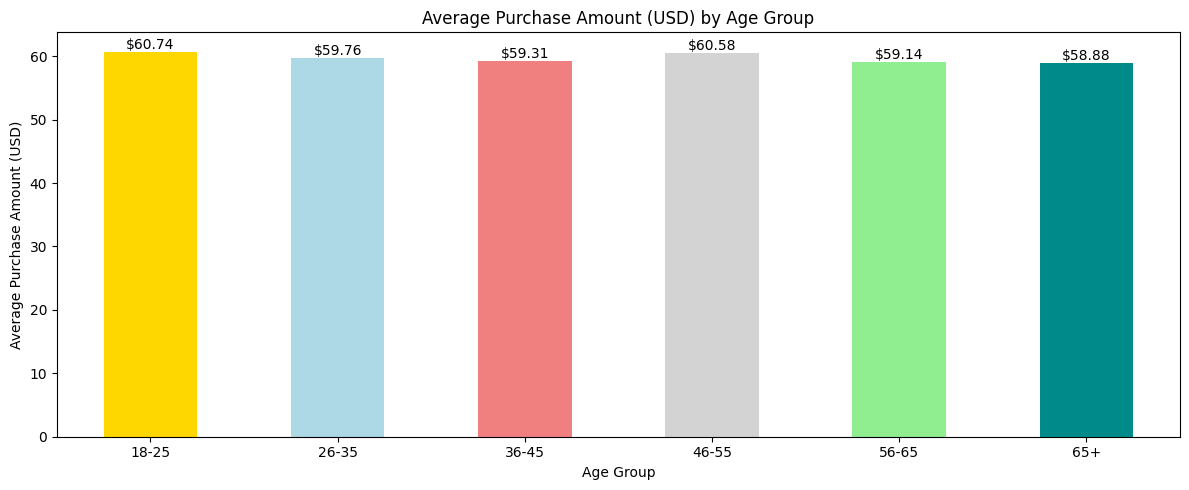

In [8]:
#%% Average Purchase Amount by Age Group

average_purchase_amount_by_age_group=df.groupby(['Age Group'])['Purchase Amount (USD)'].mean()
colors=['gold','lightblue','lightcoral','lightgray','lightgreen','darkcyan']
bars=average_purchase_amount_by_age_group.plot(kind='bar',color=colors, figsize=(12,5))

plt.title('Average Purchase Amount (USD) by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

<ipython-input-9-90159a91cf5b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_amount_by_age_group_and_gender=df.groupby(['Age Group','Gender'])['Purchase Amount (USD)'].mean().unstack()


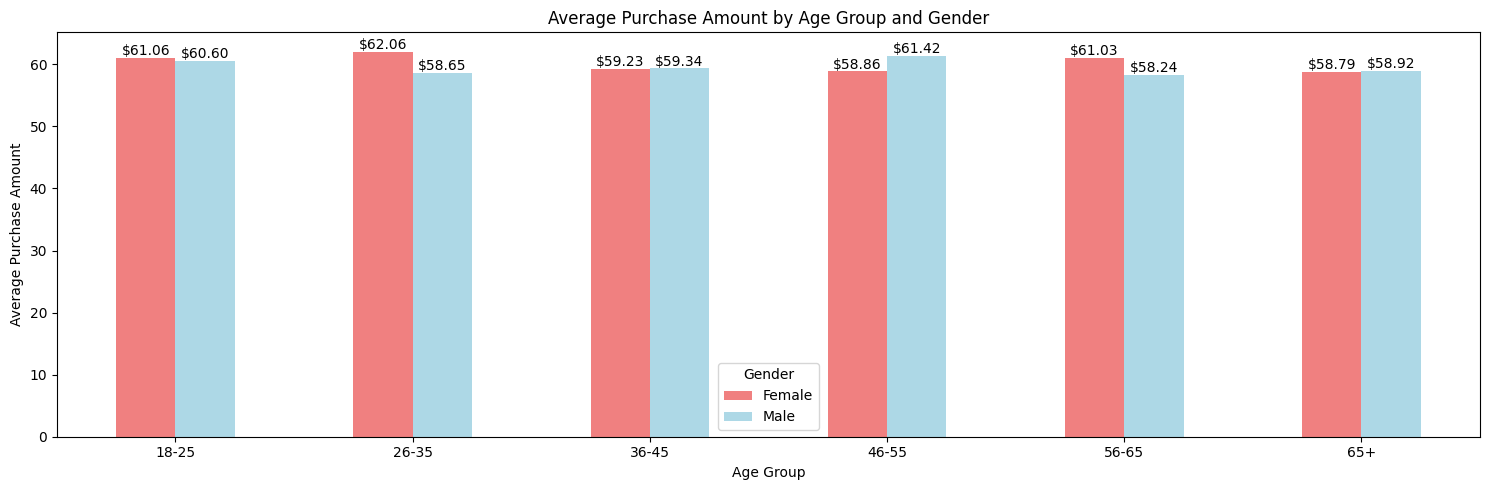

In [9]:
#%% Average Purchase Amount by Age Group and Gender
average_purchase_amount_by_age_group_and_gender=df.groupby(['Age Group','Gender'])['Purchase Amount (USD)'].mean().unstack()
colors=['lightcoral','lightblue']
bars=average_purchase_amount_by_age_group_and_gender.plot(kind='bar',color=colors,figsize=(15,5))

plt.title('Average Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

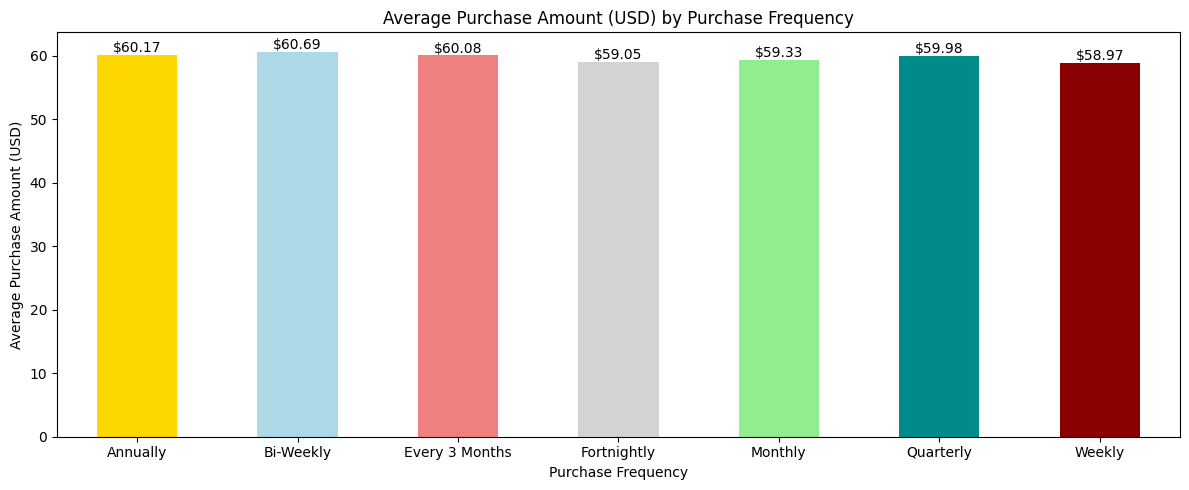

In [10]:
#%% Average Purchase Amount (USD) by Purchase Frequency
average_purchase_amount_by_purchase_frequency=df.groupby(['Frequency of Purchases'])['Purchase Amount (USD)'].mean()
colors=['gold','lightblue','lightcoral','lightgray','lightgreen','darkcyan','darkred']
bars=average_purchase_amount_by_purchase_frequency.plot(kind='bar',color=colors,figsize=(12,5))

plt.title('Average Purchase Amount (USD) by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),va='center',ha='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

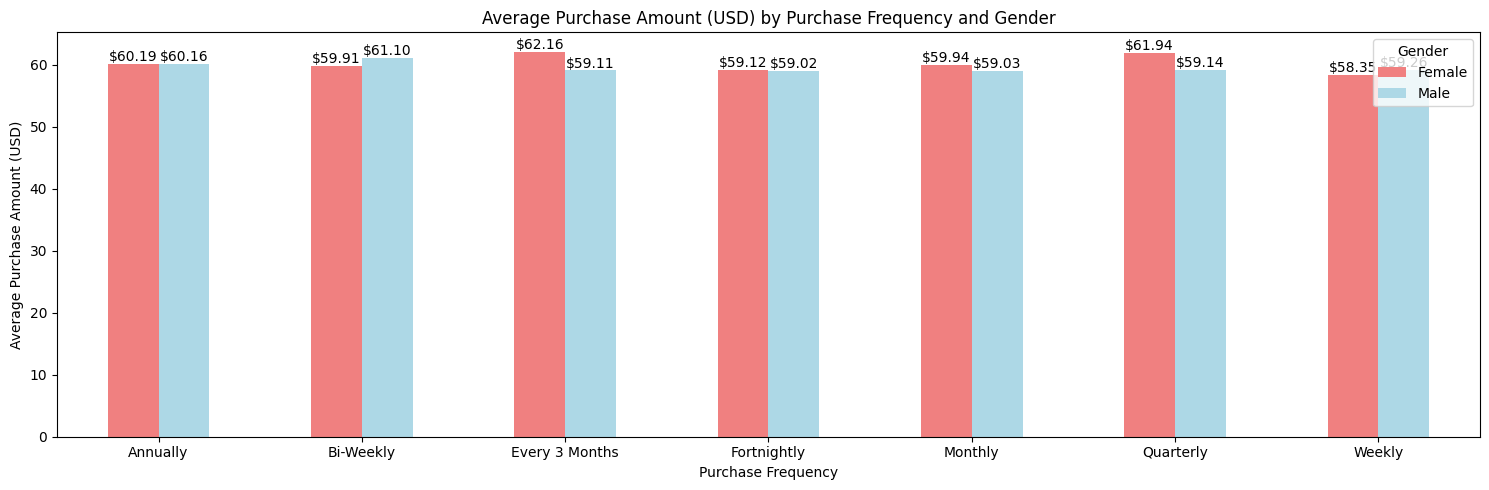

In [11]:
#%% Average Purchase Amount (USD) by Purchase Frequency and Gender
average_purchase_amount_by_purchase_frequency_and_gender=df.groupby(['Frequency of Purchases','Gender'])['Purchase Amount (USD)'].mean().unstack()
bars=average_purchase_amount_by_purchase_frequency_and_gender.plot(kind='bar',color=['lightcoral','lightblue'],figsize=(15,5))

plt.title('Average Purchase Amount (USD) by Purchase Frequency and Gender')
plt.xlabel('Purchase Frequency')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

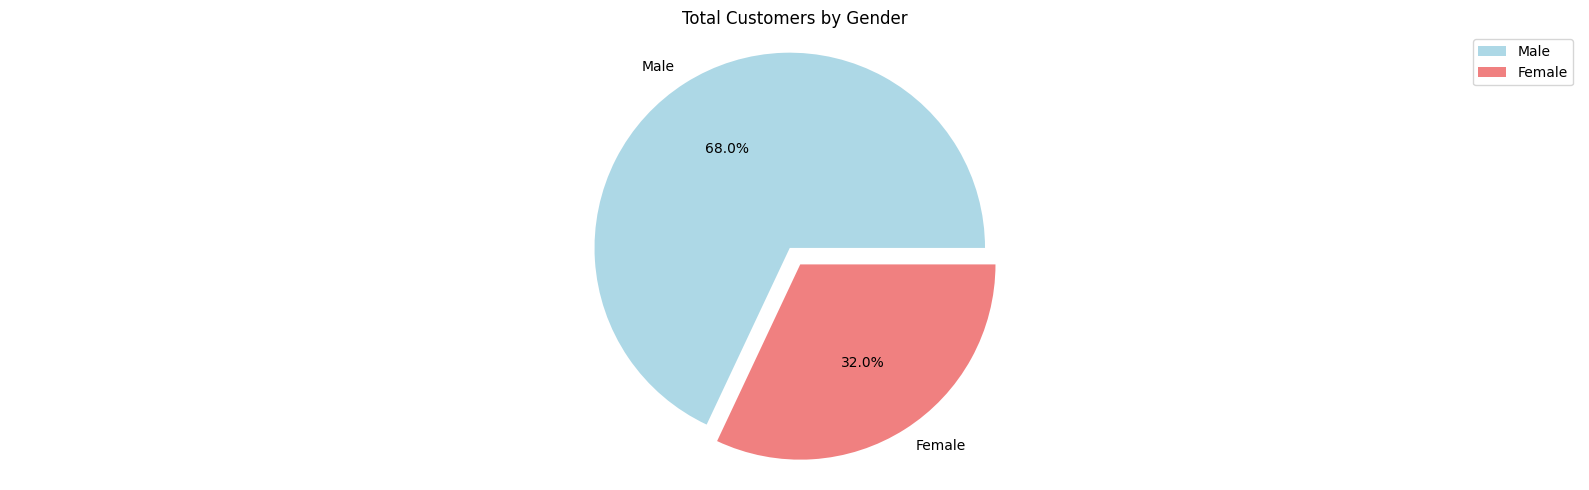

In [12]:
total_customers_by_gender=df['Gender'].value_counts()

plt.figure(figsize=(16,5))
plt.pie(total_customers_by_gender,labels=total_customers_by_gender.index,colors=['lightblue','lightcoral'],explode=(0,0.1),autopct='%.1f%%')
plt.title('Total Customers by Gender')
plt.legend(labels=total_customers_by_gender.index,loc='best')

plt.axis('equal')

plt.tight_layout()
plt.show()

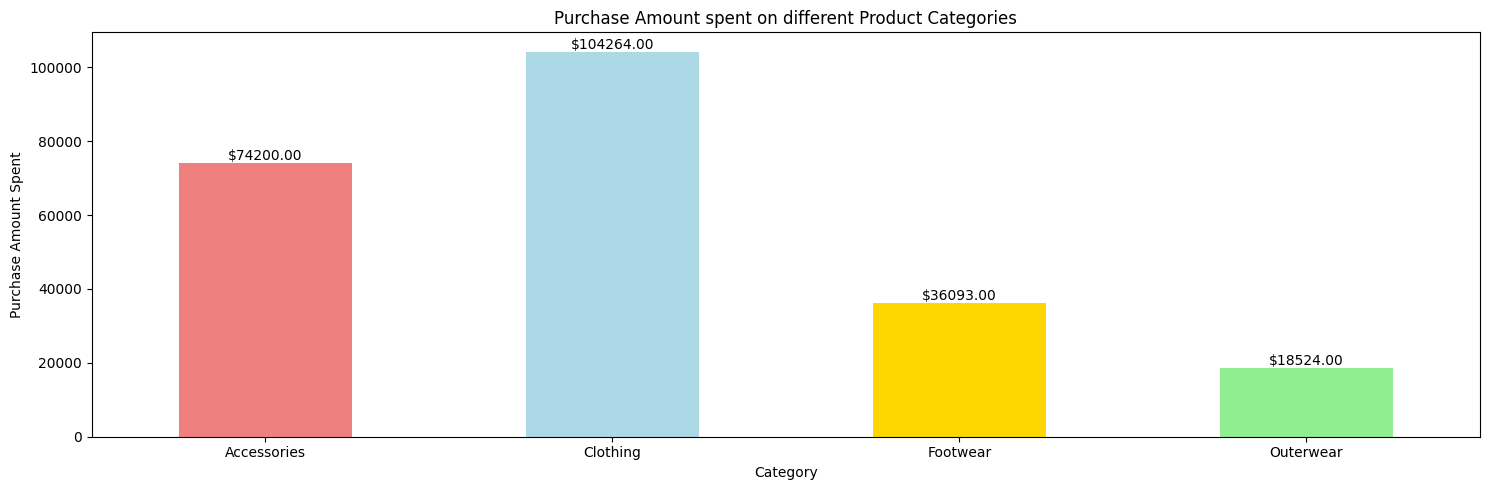

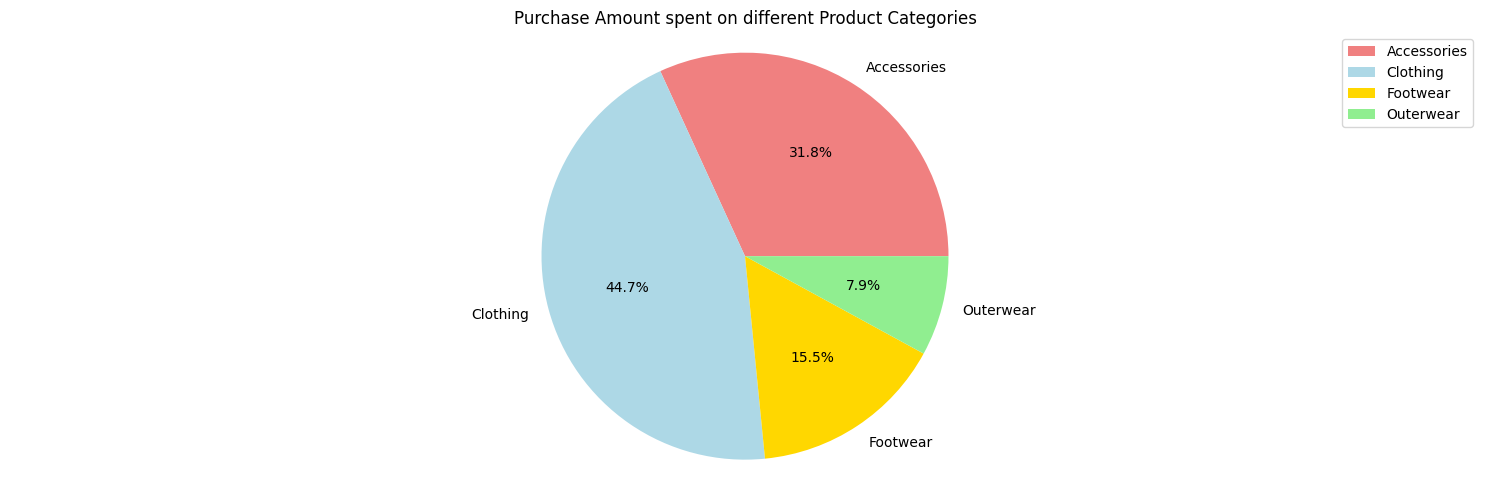

In [21]:
#%% Purchase Amount spent on different Product Categories
amount_spent_per_category=df.groupby(['Category'])['Purchase Amount (USD)'].sum()
colors=['lightcoral','lightblue','gold','lightgreen']
bars=amount_spent_per_category.plot(kind='bar',figsize=(15,5),color=colors)

plt.title('Purchase Amount spent on different Product Categories')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount Spent')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
plt.pie(amount_spent_per_category,labels=amount_spent_per_category.index,autopct='%.1f%%',colors=colors)
plt.title('Purchase Amount spent on different Product Categories')
plt.legend(amount_spent_per_category.index)
plt.axis('equal')

plt.tight_layout()
plt.show()


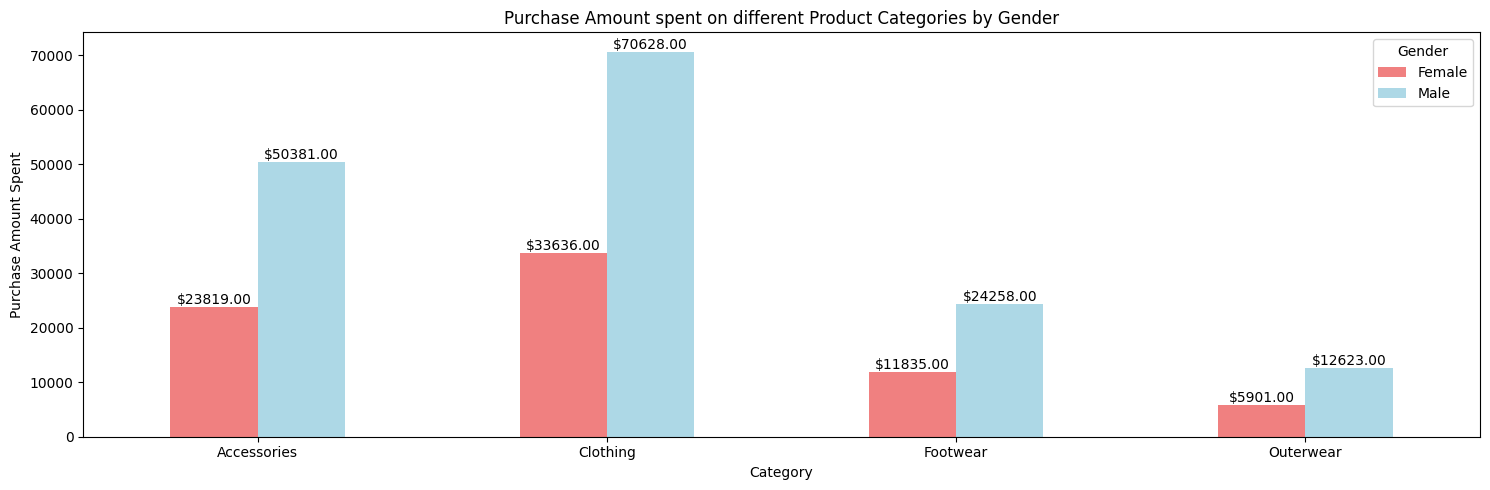

In [23]:
#%% Purchase Amount spent on different Product Categories by Gender
amount_spent_per_category_and_gender=df.groupby(['Category','Gender'])['Purchase Amount (USD)'].sum().unstack()
colors=['lightcoral','lightblue']
bars=amount_spent_per_category_and_gender.plot(kind='bar',color=colors,figsize=(15,5))

plt.title('Purchase Amount spent on different Product Categories by Gender')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount Spent')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

<ipython-input-33-f5ba19cd66e1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_spent_per_category_and_group_age=df.groupby(['Age Group','Category'])['Purchase Amount (USD)'].sum().unstack()


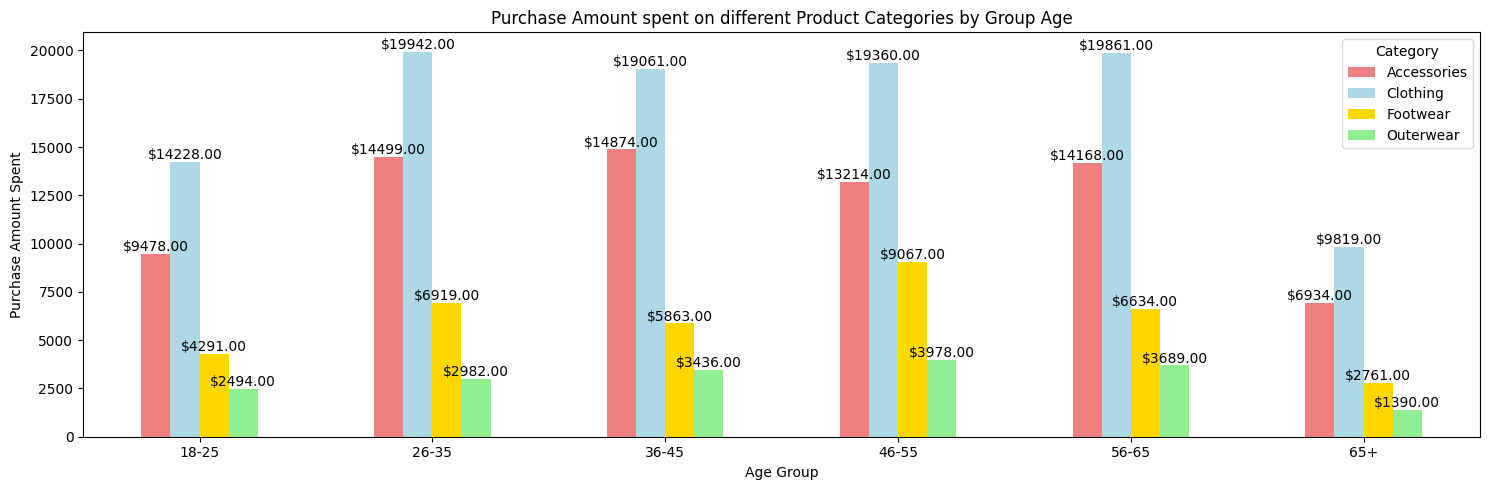

In [33]:
#%% Purchase Amount spent on different Product Categories by Group Age
amount_spent_per_category_and_group_age=df.groupby(['Age Group','Category'])['Purchase Amount (USD)'].sum().unstack()
colors=['lightcoral','lightblue','gold','lightgreen']
bars=amount_spent_per_category_and_group_age.plot(kind='bar',color=colors,figsize=(15,5))

plt.title('Purchase Amount spent on different Product Categories by Group Age')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount Spent')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

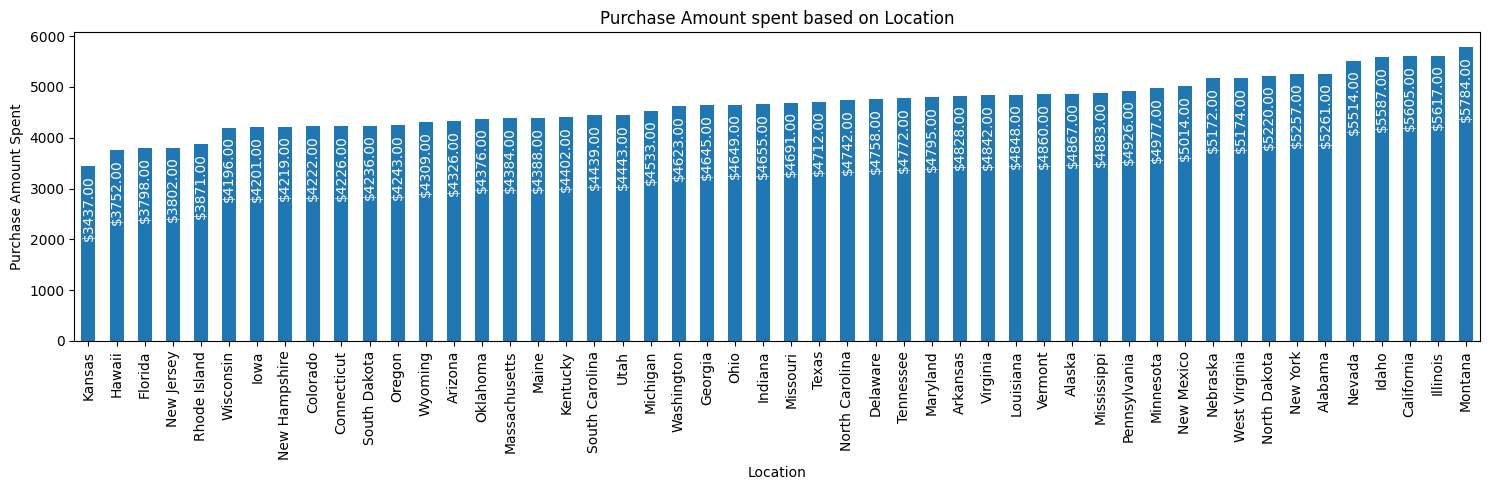

In [32]:
#%% Purchase Amount spent based on Location
amount_spent_by_location=df.groupby(['Location'])['Purchase Amount (USD)'].sum().sort_values()

bars=amount_spent_by_location.plot(kind='bar',figsize=(15,5))

plt.title('Purchase Amount spent based on Location')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Purchase Amount Spent')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,-30),textcoords='offset points',rotation=90,color='white')

plt.tight_layout()
plt.show()

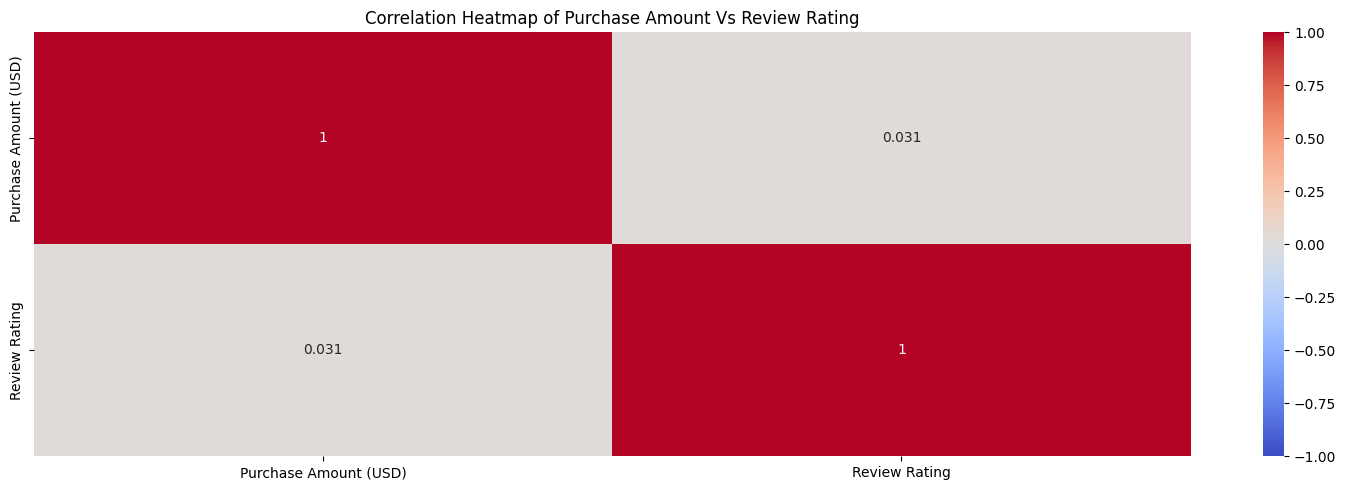

In [36]:
#%% Do higher Purchase Amounts correlate with better or worse customer ratings?

cm=df[['Purchase Amount (USD)','Review Rating']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,cmap='coolwarm',vmin=-1,vmax=1)

plt.title('Correlation Heatmap of Purchase Amount Vs Review Rating')
plt.tight_layout()
plt.show()

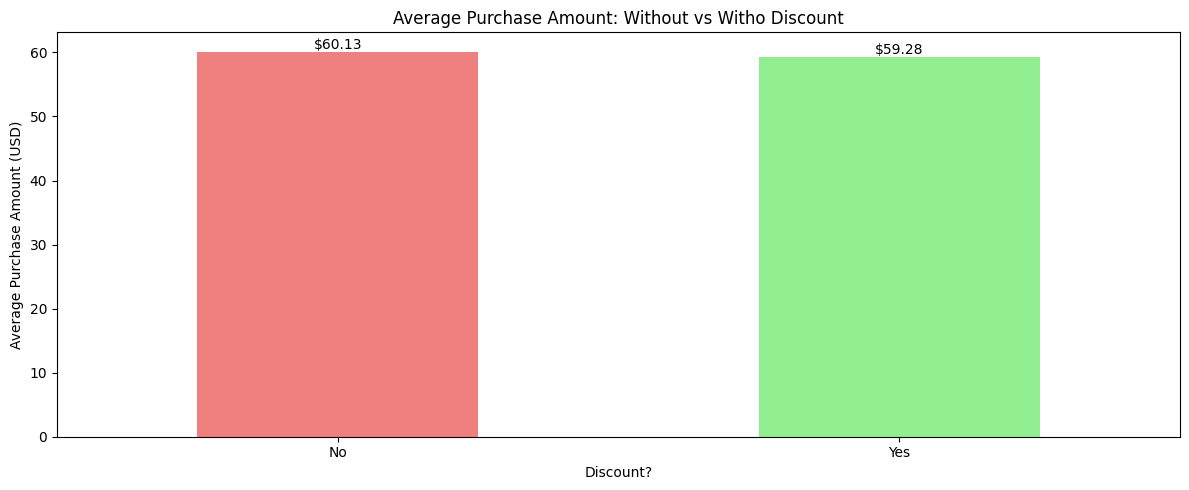

In [40]:
#%% Discount Usage
discount_analysis=df.groupby(['Discount Applied'])['Purchase Amount (USD)'].mean()
colors=['lightcoral','lightgreen']

bars=discount_analysis.plot(kind='bar',color=colors,figsize=(12,5))

plt.title('Average Purchase Amount: Without vs Without Discount')
plt.xlabel('Discount?')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

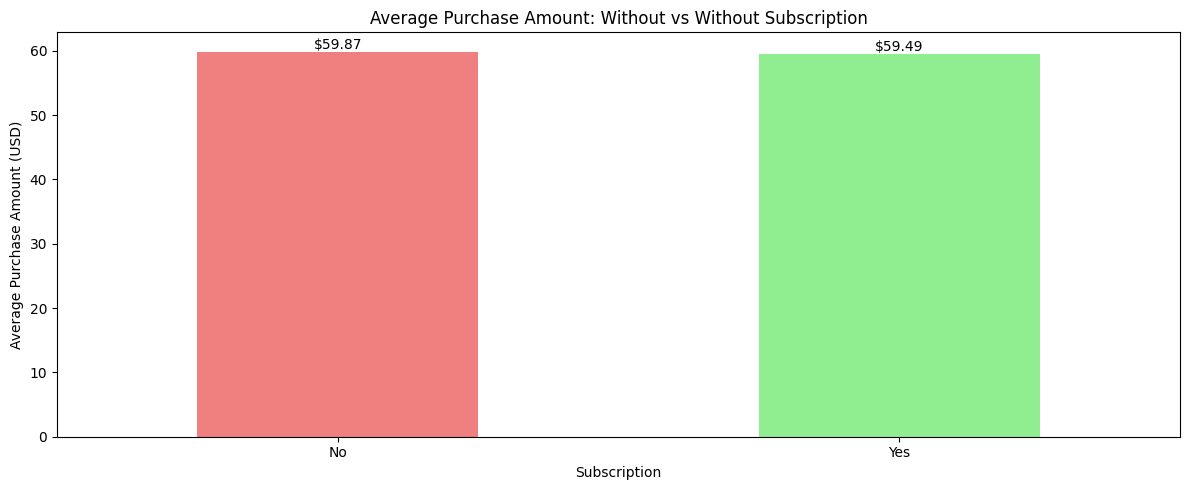

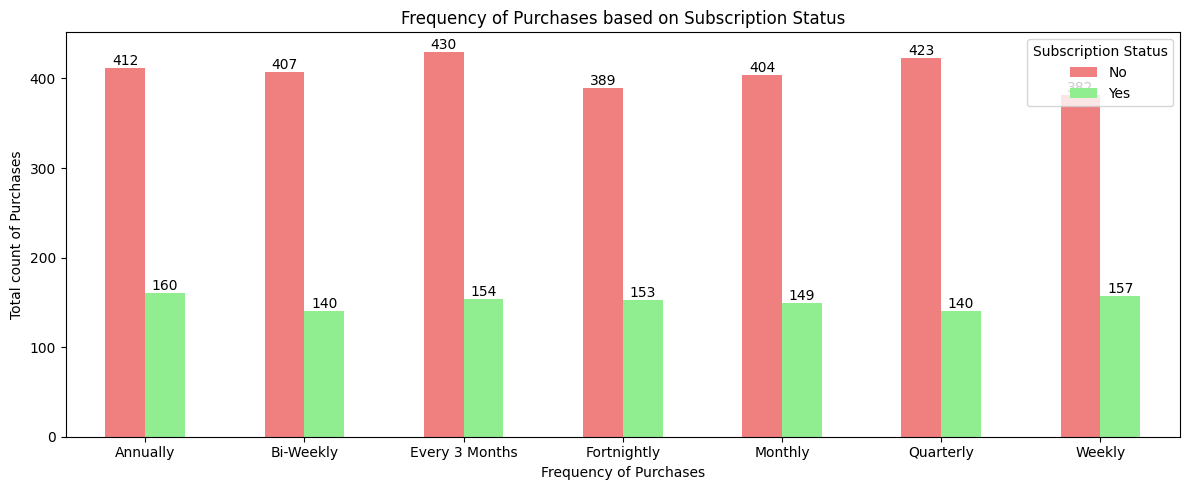

In [49]:
#%% Subscription Status
subscription_analysis=df.groupby(['Subscription Status'])['Purchase Amount (USD)'].mean()
colors=['lightcoral','lightgreen']

bars=subscription_analysis.plot(kind='bar',color=colors,figsize=(12,5))

plt.title('Average Purchase Amount: Without vs Without Subscription')
plt.xlabel('Subscription')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'${height:.2f}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

subscription_analysis2=df.groupby(['Frequency of Purchases'])['Subscription Status'].value_counts().unstack()

bars=subscription_analysis2.plot(kind='bar',color=colors,figsize=(12,5))

plt.title('Frequency of Purchases based on Subscription Status')
plt.xlabel('Frequency of Purchases')
plt.xticks(rotation=0)
plt.ylabel('Total count of Purchases')

for bar in bars.patches:
  height=bar.get_height()
  bars.annotate(f'{height}',(bar.get_x()+bar.get_width()/2,height),ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.tight_layout()
plt.show()

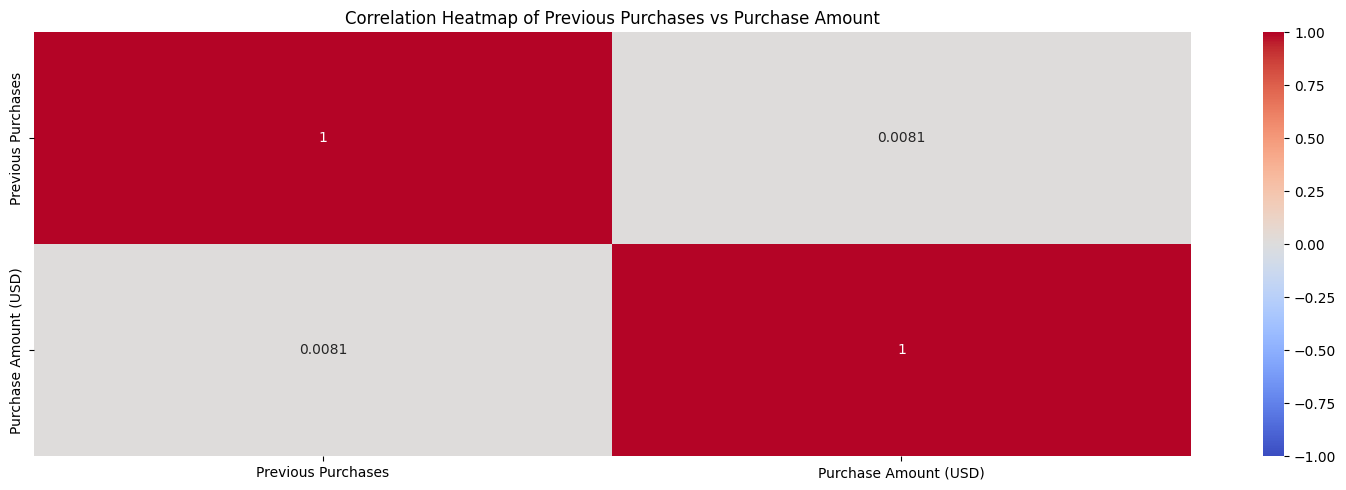

In [50]:
#%% Previous Purchases vs Purchase Amount (USD)

cm=df[['Previous Purchases','Purchase Amount (USD)']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,cmap='coolwarm',vmin=-1,vmax=1)

plt.title('Correlation Heatmap of Previous Purchases vs Purchase Amount')
plt.tight_layout()
plt.show()

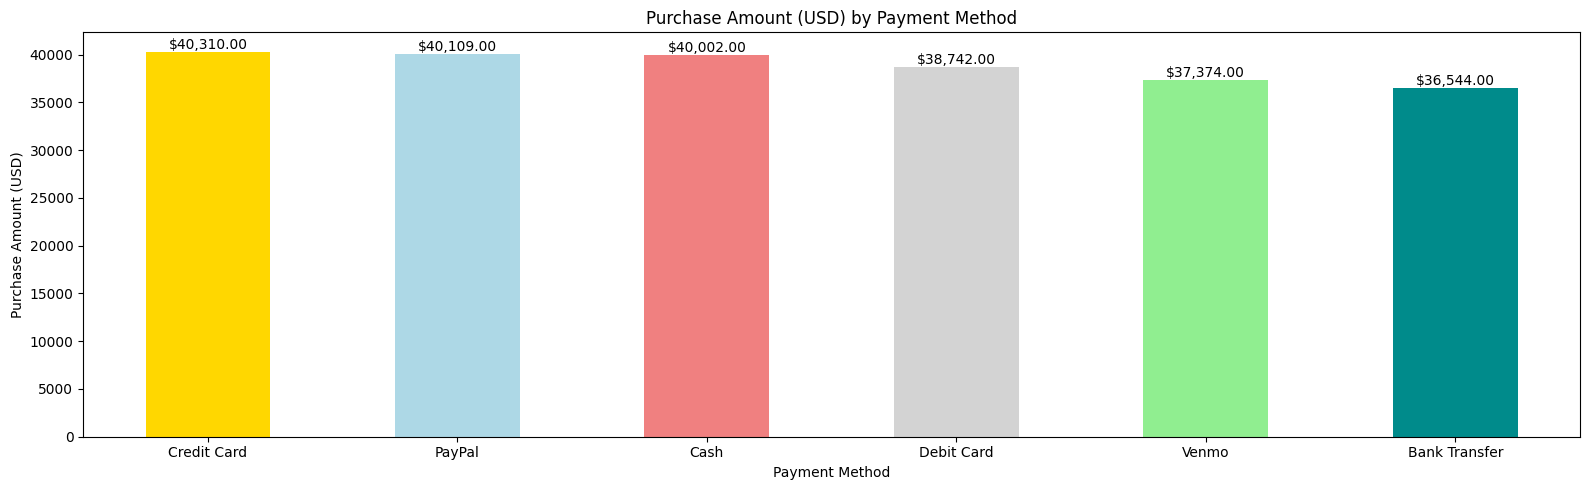

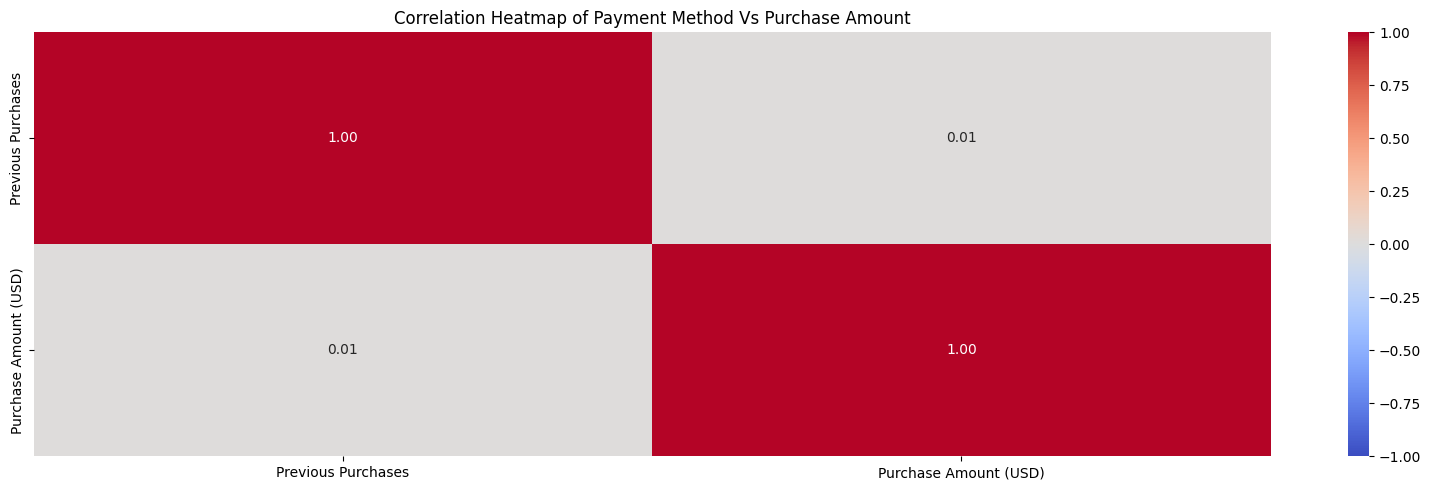

In [54]:
#%% Payment Methods
count_payment_method = df.groupby(['Payment Method'])['Purchase Amount (USD)'].sum().sort_values(ascending=False)
colors=['gold','lightblue','lightcoral','lightgray','lightgreen','darkcyan']

bars = count_payment_method.plot(kind='bar', color=colors, figsize=(16, 5))

plt.title('Purchase Amount (USD) by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.ylabel('Purchase Amount (USD)')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

plt.tight_layout()
plt.show()

payment_method_purchase_amount_correlation_matrix = df[['Previous Purchases', 'Purchase Amount (USD)']].corr()

plt.figure(figsize=(16, 5))
sns.heatmap(payment_method_purchase_amount_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Payment Method Vs Purchase Amount')

plt.tight_layout()
plt.show()

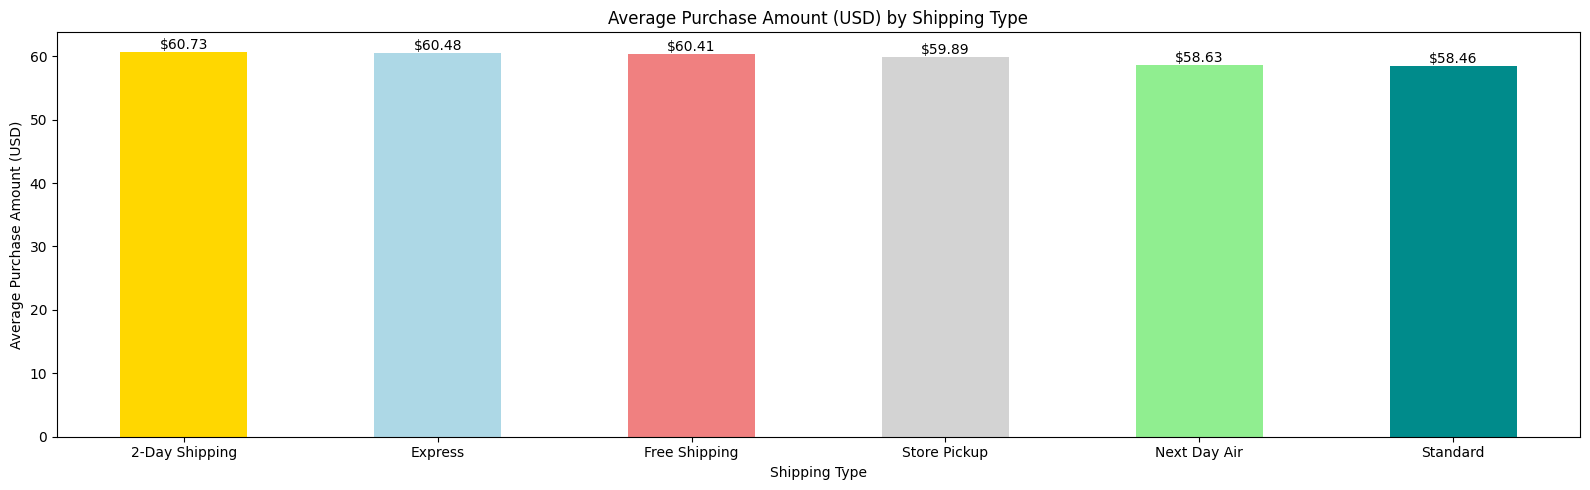

In [55]:
# Average Purchase Amount Vs Shipping Type
shipping_purchase_analysis = df.groupby(['Shipping Type'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)

bars = shipping_purchase_analysis.plot(kind='bar', color=colors, figsize=(16, 5))

plt.title('Average Purchase Amount (USD) by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Purchase Amount (USD)')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'${height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

plt.tight_layout()
plt.show()

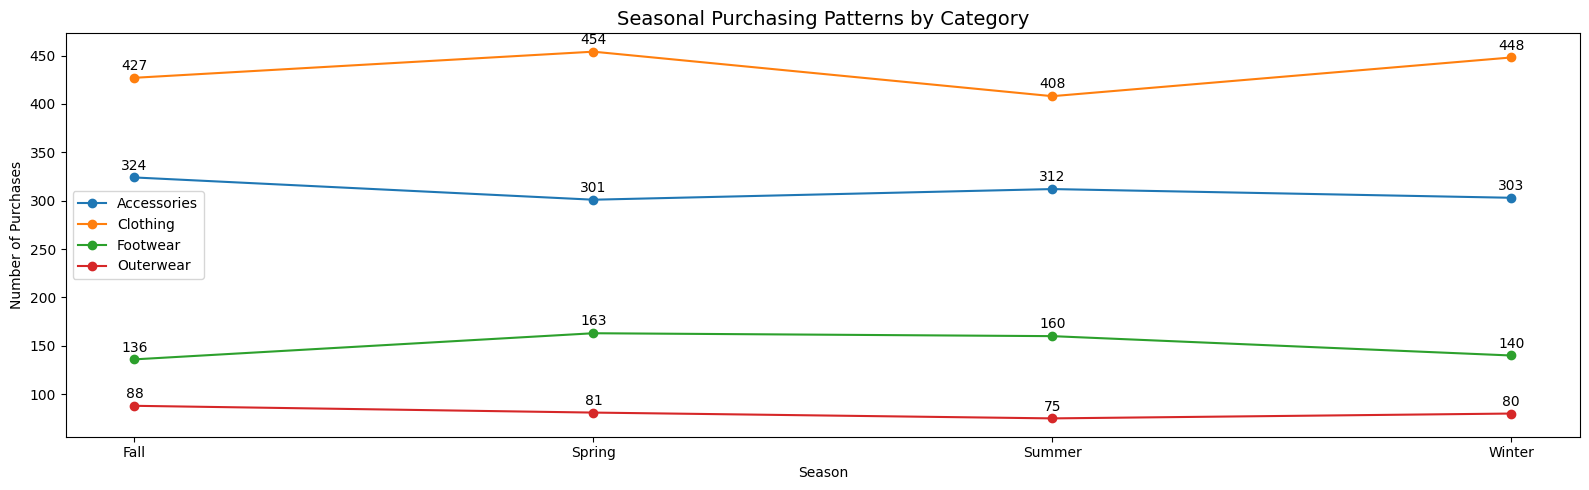

In [60]:
#%% Seasonal Purchasing Patterns
seasonal_data = df.groupby(['Season','Category'])['Category'].value_counts().unstack()

plt.figure(figsize=(16, 5))

plt.title('Seasonal Purchasing Patterns by Category', fontsize=14)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Number of Purchases', fontsize=10)

for category in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[category], label=category, marker='o')


    for i in range(len(seasonal_data)):
        plt.text(seasonal_data.index[i],
                 seasonal_data[category].iloc[i] + 5,  # Adjust y position for spacing
                 str(seasonal_data[category].iloc[i]),
                 fontsize=10,
                 ha='center',
                 va='bottom',  # Adjust for better alignment
                 color='black')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()